# Examples

- Example 01

Log Transformations:


47.15958929692766


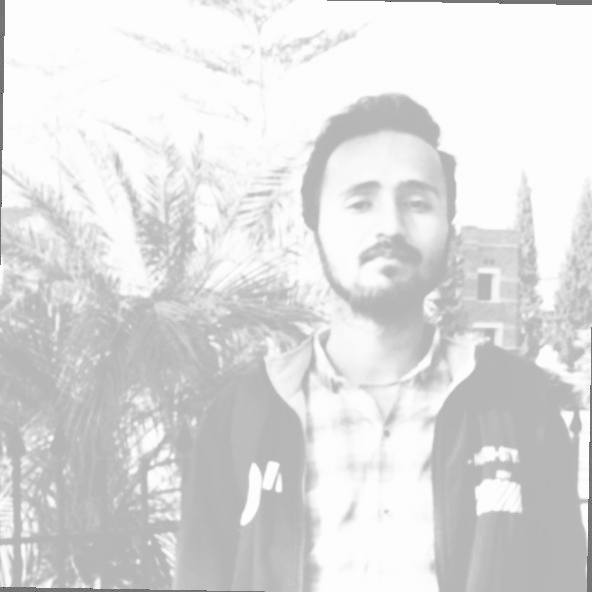

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Open the image.
img = cv2.imread('/content/2.jpg')
# Apply log transform.
c = 255/(np.log(1 + np.max(img)))
print(c)
log_transformed = c * np.log(1 + img)
# Specify the data type.
log_transformed = np.array(log_transformed, dtype = np.uint8)
# Save the output.
# cv2.imwrite('log_transformed.jpg', log_transformed)
cv2_imshow(log_transformed)


- Example 02

Power-Law (Gamma) Transformation

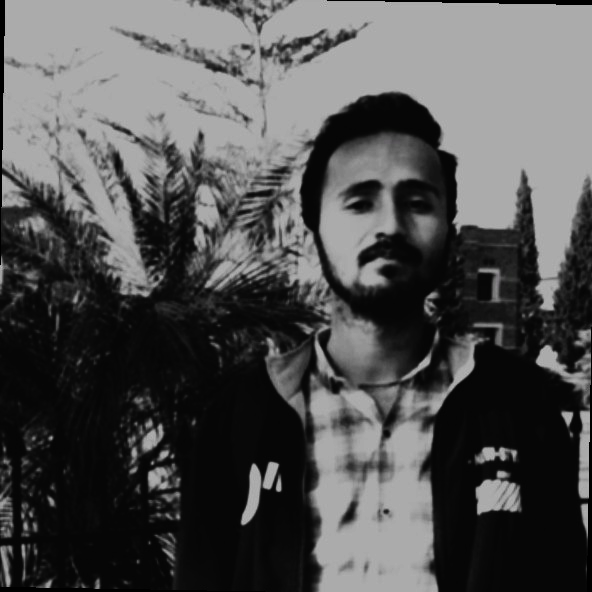

In [ ]:
import cv2
import numpy as np
# Open the image.
img = cv2.imread('/content/2.jpg')
# Trying 4 gamma values.
for gamma in [0.1, 0.5, 1.2, 2.2]:
  # Apply gamma correction.
  gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
# Save edited images.
cv2_imshow(gamma_corrected)

- Example 03

Piecewise-Linear Transformation Functions

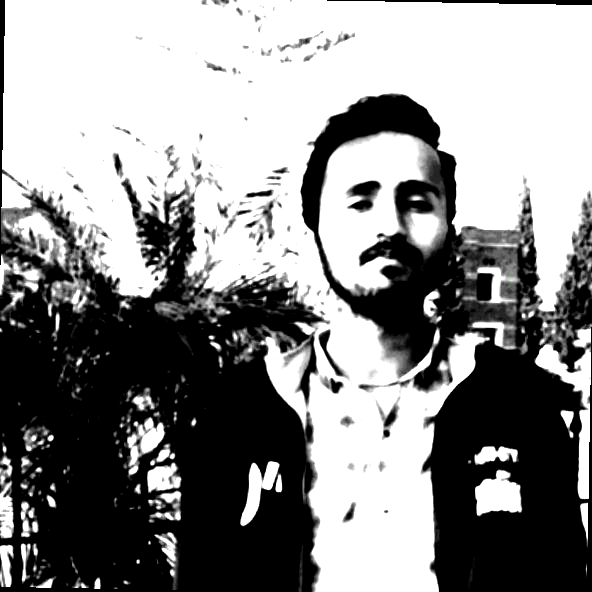

In [ ]:
def pixelVal(pix, r1, s1, r2, s2):
  if (0 <= pix and pix <= r1):
    return (s1 / r1)*pix
  elif (r1 < pix and pix <= r2):
    return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
  else:
    return ((255 - s2)/(255 - r2)) * (pix - r2) + s2
# Open the image.
img = cv2.imread('/content/2.jpg')
# Define parameters.
r1 = 70
s1 = 0
r2 = 140
s2 = 255
# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)
# Apply contrast stretching.
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)
# Save edited image.
cv2_imshow( contrast_stretched)


- Example 04

Histogram Processing of Images:


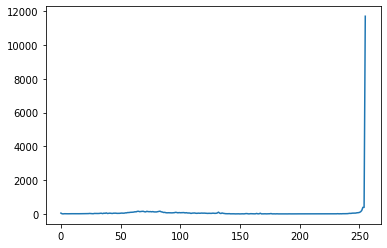

In [ ]:
import matplotlib.pyplot as plt
import cv2
img = plt.imread('/content/gun.jpg')
img1 = plt.imread('/content/flower.jpg')

# cv2.calcHist(images, channels, mask, histSize, ranges)
histr = cv2.calcHist([img1],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()



# Task 01

Write a python function to perform a simple version of image
solarization technique (also known as Sabatier effect), a point
transformation that processes an image by leaving all pixels brighter
than a certain value (T) untouched, while extracting the negative of
all pixels darker than T.

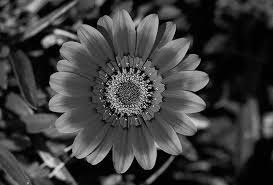

Resized Dimensions :  (185, 273)



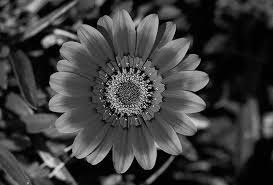

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from google.colab import files
# img = files.upload()
img = cv2.imread('/content/flower.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)


print('Resized Dimensions : ',img.shape)
# cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i,j]<100:
      img[i,j]=img[i,j]
  if img[i,j]>200:
    img[i,j]= 255 - img[i,j]
print()   
cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()   

# Task 02
 Write a python function to perform a point transformation by which each
pixel value in an input image of class uint8 is replaced by the square
of its original value.


Resized Dimensions :  (185, 273)


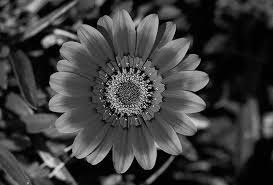

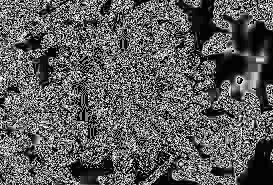

In [10]:
# import Opencv
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Open the image.
img = cv2.imread('/content/flower.jpg', cv2.IMREAD_GRAYSCALE)
print('Resized Dimensions : ',img.shape)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
for i in range(img.shape[0]):
 for j in range(img.shape[1]):
  img[i,j] = (img[i,j])**2
print()   
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()   

# Task 03

 Write a python function to perform a point transformation by which each
pixel value in an input image of class uint8 is replaced by the square
of its original value.

- a. Calculate the probabilities of each gray level and plot the
image’s histogram.
- b. Which pixels are predominant in the original image, dark or
bright?
- c. Using the cumulative distribution function, equalize the
histogram calculated in part (a) and plot the resulting
(equalized) histogram.
- d. Show the resulting 7 × 7 image after histogram equalization.


[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]]


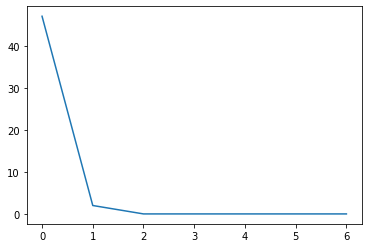

In [11]:
import matplotlib.pyplot as plt #importing matplotlib
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img = np.array([[0,3/7,2/7,2/7,1/7,1/7,4/7],[3/7,2/7,1/7,1/7,1/7,1/7,4/7],[2/7,0,1,1/7,3/7,0,0],[0,5/7,1/7,0,6/7,0,1/7],[1/7,1/7,1/7,3/7,6/7,6/7,5/7],[1/7,1/7,1/7,1/7,5/7,6/7,4/7],[0,1,0,0,0,0,4/7]])
img = np.uint8(img)
print(img)
histr = cv2.calcHist([img],[0],None,[7],[0,7])
plt.plot(histr)
plt.show()


- Which pixels are predominant in the original image, dark or
bright?
#Answer:
 As histogram is more toward starting side it means the image has more dark pixells as compare to bright ones.

- Using the cumulative distribution function, equalize the
histogram calculated in part (a) and plot the resulting
(equalized) histogram.


[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]]


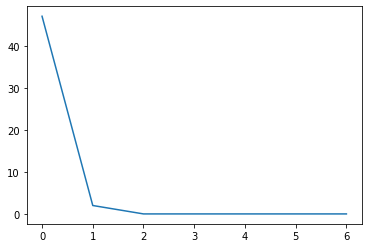

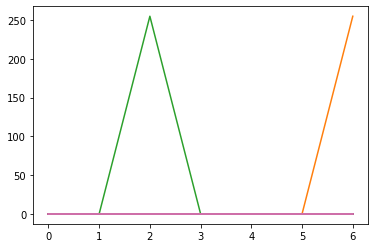

In [13]:
import matplotlib.pyplot as plt #importing matplotlib
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img = np.array([[0,3/7,2/7,2/7,1/7,1/7,4/7],[3/7,2/7,1/7,1/7,1/7,1/7,4/7],[2/7,0,1,1/7,3/7,0,0],[0,5/7,1/7,0,6/7,0,1/7],[1/7,1/7,1/7,3/7,6/7,6/7,5/7],[1/7,1/7,1/7,1/7,5/7,6/7,4/7],[0,1,0,0,0,0,4/7]])
img = np.uint8(img)
print(img)
histr = cv2.calcHist([img],[0],None,[7],[0,7])
plt.plot(histr)
plt.show()
equ = cv2.equalizeHist(img)
plt.plot(equ)
plt.show()

- Show the resulting 7 × 7 image after histogram equalization.


In [15]:
cv2_imshow(equ)
print(equ.shape)


(7, 7)


# Task 04
Write a PYTHON script that implements region-based histogram 
equalization. Your script should perform random selection of region of 
interest (ROI) within an image to which the histogram equalization 
operation will be applied. (Use any three gray scale image from Python 
for processing and display of results)